In [35]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
from scipy.ndimage import label
import numpy as np
import ast
from scipy.ndimage import gaussian_filter
from matplotlib.colors import ListedColormap
import corner

def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None;
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from sampler.models.mass.mass_1d.pdb_with_NG import pdb_with_NG, broken_power
from sampler.models.mass.pairing_functions.beta_split_3 import beta_split_3

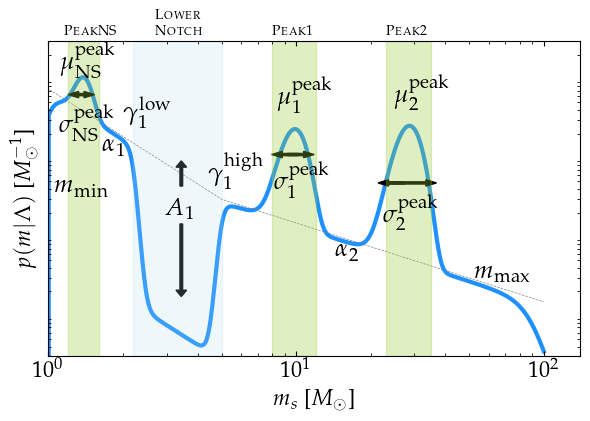

In [37]:
FONTSIZE = 16
m = np.logspace(np.log10(0.9), np.log10(100), 1000)

alpha_1 = -2
alpha_2 = -1
gamma_low = 2.2
m_break = 5
eta_low = 40
gamma_high = 5.0
eta_high = 40
A = 0.99
m_min = 1
eta_min = 20
m_max = 90
eta_max = 10
mu_peak1 = 29
sig_peak1 = 3
peak_constant1 = 400
mu_peak2 = 10
sig_peak2 = 1
peak_constant2 = 40


mu_peak_NS = 1.4
sig_peak_NS = 0.1
peak_constant_NS = 0.5

gamma_low2 = 45
gamma_high2 = 80
eta_low2 = 100
eta_high2 = 100
A2 = 0.7
model_min = 1
model_max = 140

p_m = pdb_with_NG(m, m_break, alpha_1, alpha_2,
                gamma_low, eta_low, gamma_high, eta_high, A, m_min, eta_min, m_max, eta_max,
                mu_peak1, sig_peak1, peak_constant1,
                mu_peak2, sig_peak2, peak_constant2,
                mu_peak_NS, sig_peak_NS, peak_constant_NS,
                model_min, model_max)
p_m = 1.1*p_m / np.sum(p_m)

bpl = broken_power(m, alpha_1, alpha_2, m_break, 1)
bpl = bpl/np.sum(bpl)

plt.figure(figsize=(6, 4.32))
label_dict = {"mu_peak1":r"$\mu^{\mathrm{peak}}_1$",
              "mu_peak2":r"$\mu^{\mathrm{peak}}_2$",
              "sigma_peak1":r"$\sigma^{\mathrm{peak}}_1$",
              "sigma_peak2":r"$\sigma^{\mathrm{peak}}_2$",
              "mu_peak_hat_1":r"$\hat{\mu}^{7:11}_1$",
              "mu_peak_hat_2":r"$\hat{\mu}^{25:40}_2$",
              "sigma_peak_hat_1":r"$\hat{\sigma}^{7:11}_1$",
              "sigma_peak_hat_2":r"$\hat{\sigma}^{25:40}_2$",
              "m_max":r"$m_{\mathrm{max}}$",
              "m99":r"$m_{99}$",
              "gamma_high2":r"$\gamma^{\mathrm{high}}_2$",
              "gamma_low2":r"$\gamma^{\mathrm{low}}_2$",
              "gamma_high1":r"$\gamma^{\mathrm{high}}_1$",
              "gamma_low1":r"$\gamma^{\mathrm{low}}_1$",
}
labels = [r"$m_{\mathrm{min}}$",
          label_dict["m_max"],
          label_dict["gamma_low1"],
          label_dict["gamma_high1"],
          r"$A_1$",
          #r"$A_2$",
          #label_dict["gamma_low2"],
          #label_dict["gamma_high2"],
          label_dict["mu_peak2"],
          label_dict["sigma_peak2"],
          label_dict["mu_peak1"],
          label_dict["sigma_peak1"],
          r"$\alpha_1$",
          r"$\alpha_2$",
          ]



arrow_locs = [(0.25, 0.54, 0.0, 0.08, 0.005), (0.25, 0.42, 0.0, -0.23, 0.005), (0.45, 0.64, 0.05, 0, 0.007), (0.47, 0.64, -0.05, 0, 0.007), (0.63, 0.55, 0.1, 0, 0.007), (0.67, 0.55, -0.05, 0, 0.007)]
# locs = [(0.02, 0.84), (0.94, 0.02), (0.26, 0.75), (0.40, 0.56), (0.32, 0.45), (0.87, 0.15), (0.82, 0.35), (0.93, 0.24), (0.73, 0.81), (0.73, 0.43), (0.53, 0.80), (0.525, 0.53), (0.20, 0.85), (0.64, 0.31)]
locs = [(0.01, 0.52), (0.8, 0.25), (0.14, 0.75), (0.30, 0.56), (0.22, 0.45), (0.65, 0.81), (0.63, 0.43), (0.43, 0.80), (0.425, 0.53), (0.10, 0.65), (0.54, 0.32)]

plt.plot(m, p_m, linewidth=3, color="dodgerblue", zorder=0)
plt.plot(m, bpl, linewidth=0.5, color="grey", zorder=0, linestyle="dashed")


labels.extend([r"$\mu^{\mathrm{peak}}_{\mathrm{NS}}$",r"$\sigma^{\mathrm{peak}}_{\mathrm{NS}}$"])
X = 0.047
Y = 0.83
arrow_locs.extend([(X, Y, 0.04, 0, 0.007), (X, Y, -0.01, 0, 0.007)])
locs.extend([(0.022, 0.91), (0.02, 0.71)])

for i in range(len(locs)):
    plt.text(locs[i][0], locs[i][1], labels[i], color="black", fontsize=18, transform=plt.gca().transAxes)

for i in range(len(arrow_locs)):
    plt.arrow(arrow_locs[i][0], arrow_locs[i][1], arrow_locs[i][2], arrow_locs[i][3], transform=plt.gca().transAxes, width = arrow_locs[i][4], color = "black", head_width=0.02, head_length=0.02, linewidth=1, length_includes_head=True)


labels2 = [r"$\textsc{Lower}$""\n"r"$\textsc{Notch}$", r"$\textsc{Peak}$1", r"$\textsc{Peak}$2", r"$\textsc{Upper}$""\n"r"$\textsc{Notch}$", r"$\textsc{Peak}$NS"]
lev = 1.02
locs2 = [(0.20, lev), (0.42, lev), (0.635, lev), (0.78, lev), (0.03, lev)]

idx_remove = 3
labels2.pop(idx_remove)
locs2.pop(idx_remove)

for i in range(len(locs2)):
    plt.text(locs2[i][0], locs2[i][1], labels2[i], color="black", fontsize=10, transform=plt.gca().transAxes)

hex2 = "yellowgreen"
hex1 = "lightblue"

plt.axvspan(gamma_low, gamma_high, color=hex1, alpha=0.2)
# plt.axvspan(gamma_low2-1, gamma_high2, color=hex1, alpha=0.2)
plt.axvspan(mu_peak2-sig_peak2*2, mu_peak2+sig_peak2*2, color=hex2, alpha=0.3)
plt.axvspan(mu_peak1-sig_peak1*2, mu_peak1+sig_peak1*2, color=hex2, alpha=0.3)
plt.axvspan(mu_peak_NS - sig_peak_NS*2,mu_peak_NS + sig_peak_NS*2,color=hex2, alpha=0.3)

# plt.text(0.05, 0.1, r"$\textsc{BPL}\times n_1n_2(1+c_1\mathcal{G}_1 + c_2\mathcal{G}_2)$", transform=plt.gca().transAxes, fontsize=18, color="black")
# plt.text(0.70, 0.87, r"$\textsc{MultiPDB}$", transform=plt.gca().transAxes, fontsize=18, color="black")

plt.xlim(1, 140)
plt.ylim(3e-6, 3e-2)
plt.xscale("log")
plt.yscale("log")
plt.yticks([])
plt.ylabel("$p(m|\Lambda)$ [$M_{\odot}^{-1}$]", fontsize=FONTSIZE)
plt.xlabel("$m_{s}$ [$M_{\odot}$]", fontsize=FONTSIZE)
plt.gca().tick_params(direction='in', which='both', right=True, top=True, labelsize=FONTSIZE)
plt.savefig("plots/pop_model.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/hr/fxn20ncj0qq2_mtm8k66bl7r0000gn/T/ipykernel_39998/1889153809.py:77: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for coll in getattr(cnt, "collections", []):


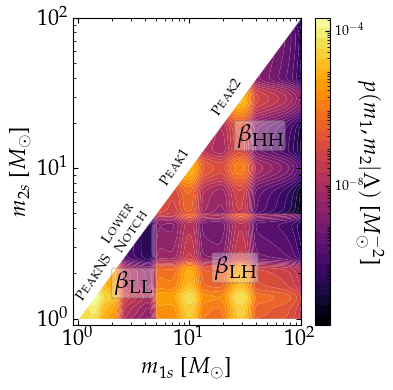

In [38]:
beta_1 = 2 # 2.31
beta_2 = 2 # 1.20
beta_gap = 0 # 1.10
sep = 5

mass_func = lambda m: pdb_with_NG(m, m_break, alpha_1, alpha_2,
                gamma_low, eta_low, gamma_high, eta_high, A, m_min, eta_min, m_max, eta_max,
                mu_peak1, sig_peak1, peak_constant1,
                mu_peak2, sig_peak2, peak_constant2,
                mu_peak_NS, sig_peak_NS, peak_constant_NS,
                model_min, model_max)

pairing_func = beta_split_3
pairing_function_args = (beta_1, beta_2, beta_gap, sep)

m1, m2 = np.meshgrid(m, m)
p_m1 = mass_func(m1)
p_m2 = mass_func(m2)
f = pairing_func(m1, m2, *pairing_function_args)

mat = (p_m1 * p_m2 * f)
mat = np.where(m2 >= m1, 0.0, mat)
p_joint = mat / np.sum(mat)

Z = np.ma.masked_less_equal(p_joint, 0.0)
Z = np.ma.masked_where(m2 >= m1, Z)

plt.figure(figsize=(4,4))
lev_min = 2e-15
lev_max = 2e-1

# Make levels consistent with the actual data range after masking
vmin = max(lev_min, float(Z.min()))
vmax = min(lev_max, float(Z.max()))
levs = np.geomspace(vmin, vmax, num=31, endpoint=True)

cnt = plt.contourf(m1, m2, Z, levels=levs, cmap="inferno",
                   norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))

padding = 0.015
notch_factor = 2.5
locs2 = [(0.16 - padding * notch_factor, 0.20 + padding * notch_factor),
         (0.39 - padding, 0.44 + padding),
         (0.62 - padding, 0.67 + padding),
         # (0.74 - padding * notch_factor, 0.80 + padding * notch_factor),
         (0.02 - padding*0.9, 0.07 + padding*0.9)]
for i in range(len(locs2)):
    plt.text(locs2[i][0], locs2[i][1], labels2[i], color="black",
             transform=plt.gca().transAxes, fontsize=10, rotation=56)

plt.xscale("log"); plt.yscale("log")
plt.xlabel(r"$m_{1s}$ [$M_{\odot}$]", fontsize = FONTSIZE); plt.ylabel(r"$m_{2s}$ [$M_{\odot}$]", fontsize=FONTSIZE)

beta_labels = [
    (r"$\beta_{\mathrm{LL}}$",  (0.18, 0.12)),  # BNS corner (low m1, low m2)
    (r"$\beta_{\mathrm{LH}}$", (0.62, 0.17)), # NSBH band (mid x, low y)
    (r"$\beta_{\mathrm{HH}}$",  (0.72, 0.60)),  # BBH corner (high m1, lower m2)
]

for txt, (x, y) in beta_labels:
    plt.text(
        x, y, txt,
        transform=plt.gca().transAxes,
        fontsize=18, fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.1", facecolor="white", edgecolor="0.4", alpha=0.3)
    )


cbar = plt.colorbar(cnt)
# keep ticks within [vmin, vmax]
ticks = [t for t in [1e-12, 1e-8, 1e-4] if (vmin <= t <= vmax)]
if ticks: cbar.set_ticks(ticks)
cbar.ax.set_ylabel(r"$p(m_{1}, m_{2}|\Lambda)$ [$M_{\odot}^{-2}$]", rotation=270, labelpad=15, fontsize=FONTSIZE)
cbar.ax.minorticks_on()
cbar.ax.tick_params(direction='in', which="both")

for coll in getattr(cnt, "collections", []):
    coll.set_edgecolor("face")
    coll.set_linewidth(0)

plt.gca().tick_params(direction='in', which='both', right=True, top=True, labelsize=FONTSIZE)
plt.tight_layout()
plt.savefig("plots/pop_model_joint.png", dpi=300, bbox_inches='tight')
plt.show()


In [39]:
from matplotlib.ticker import FormatStrFormatter
import sys
sys.path.append("..")
from sampler.models.mass.mass_1d.pdb_with_NG import pdb_with_NG
from sampler.models.mass.pairing_functions.beta_split_3 import beta_split_3

alpha_1 = -3.99
alpha_2 = -0.30
gamma_low = 2.99
m_break = 6.50
eta_low = 24.84
gamma_high = 6.04
eta_high = 25.06
A = 0.14
m_min = 1.10
eta_min = 30.51
m_max = 70.95
eta_max = 4.48
mu_peak1 = 9.28
sig_peak1 = 1.60
peak_constant1 = 267.79
mu_peak2 = 29.33
sig_peak2 = 9.75
peak_constant2 = 215.33


mu_peak_NS = 1.4
sig_peak_NS = 0.1
peak_constant_NS = 0

gamma_low2 = 45
gamma_high2 = 80
eta_low2 = 100
eta_high2 = 100
A2 = 0
model_min = 1
model_max = 140

beta_1 = 1.29 # 2.31
beta_2 = 2.27 # 1.20
beta_gap = 1.04 # 1.10
sep = 5

mass_func = lambda m: pdb_with_NG(m, m_break, alpha_1, alpha_2,
                gamma_low, eta_low, gamma_high, eta_high, A, m_min, eta_min, m_max, eta_max,
                mu_peak1, sig_peak1, peak_constant1,
                mu_peak2, sig_peak2, peak_constant2,
                mu_peak_NS, sig_peak_NS, peak_constant_NS,
                model_min, model_max)



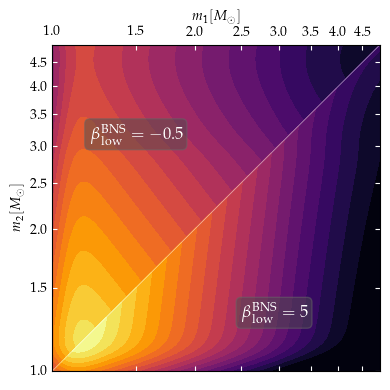

In [40]:
m = np.logspace(np.log10(0.9), np.log10(10), 1000)
pairing_func = beta_split_3
m1, m2 = np.meshgrid(m, m)

beta_1 = 5
beta_1_alt = -0.5

pairing_function_args = (beta_1, beta_2, beta_gap, sep)
f = pairing_func(m1, m2, *pairing_function_args)
mat = np.where(m2 > m1, 0.0, (mass_func(m1) * mass_func(m2) * f))
p_joint = mat / np.sum(mat)
Z = np.ma.masked_less_equal(p_joint, 0.0)

pairing_function_args_alt = (beta_1_alt, beta_2, beta_gap, sep)
f_alt = pairing_func(m2, m1, *pairing_function_args_alt)  # swap to mirror
mat_alt = np.where(m2 < m1, 0.0, (mass_func(m2) * mass_func(m1) * f_alt))
p_joint_alt = mat_alt / np.sum(mat_alt)
Z_alt = np.ma.masked_less_equal(p_joint_alt, 0.0)

Z_full = np.ma.where(m2 > m1, Z_alt, Z)

fig, ax = plt.subplots(figsize=(4,4))
lev_min = 2e-9
lev_max = 2e-4

# Make levels consistent with actual data range after masking
vmin = max(lev_min, float(Z_full.min()))

Z_full = np.where(Z_full < vmin, vmin*1.001, Z_full)

vmax = min(lev_max, float(Z_full.max()))
levs = np.geomspace(vmin, vmax, num=21, endpoint=True)

cnt = ax.contourf(m1, m2, Z_full, levels=levs, cmap="inferno",
                  norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))

ax.plot([m.min(), m.max()], [m.min(), m.max()], lw=0.5, color="white", alpha=0.6)
ax.set_xscale("log"); ax.set_yscale("log")

ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

ticks = np.arange(1.0, 4.6, 0.5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))

ax.text(2.5, 1.3, rf"$\beta_{{\rm low}}^{{\mathrm{{BNS}}}} = {beta_1}$",
        color="white", fontsize=12, fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="0.3", edgecolor="0.4", alpha=0.5))

ax.text(1.2, 3.1, rf"$\beta_{{\rm low}}^{{\mathrm{{BNS}}}} = {beta_1_alt}$",
        color="white", fontsize=12, fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", facecolor="0.3", edgecolor="0.4", alpha=0.5))

ax.tick_params(
    direction="in",
    which="both",
    top=True,
    right=True,
    bottom = True,
    color="white",
    labelcolor="black",
)

ax.set_xlim(1, 4.9); ax.set_ylim(1, 4.9)
ax.set_xlabel(r"$m_1 [M_{\odot}]$")
ax.set_ylabel(r"$m_2 [M_{\odot}]$")
plt.savefig("plots/pop_model_joint_zoom.png", dpi=300, bbox_inches='tight')